In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [822]:
train=pd.read_csv('titanic_train.csv')

In [823]:
test=pd.read_csv('titanic_test.csv')

In [824]:
train.shape

(891, 12)

In [825]:
test.shape

(418, 11)

In [826]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [827]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [828]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [829]:
train['Embarked'].fillna('S',inplace=True)

In [830]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [831]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [832]:
gen_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),size=177)

In [833]:
train['Age'][np.isnan(train['Age'])]=gen_age

C:\Users\The WonderlanD\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [834]:
gen_age_test=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),size=86)

In [835]:
test['Age'][np.isnan(test['Age'])]=gen_age_test

C:\Users\The WonderlanD\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [836]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [837]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.030740,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.055659,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.337635,0.083081,0.018443,-0.549500
Age,0.030740,-0.055659,-0.337635,1.000000,-0.212806,-0.164259,0.096197
SibSp,-0.057527,-0.035322,0.083081,-0.212806,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.164259,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096197,0.159651,0.216225,1.000000


### Finding Outliers

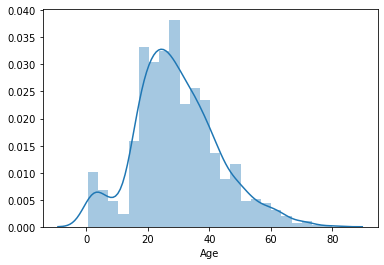

In [838]:
sns.distplot(train['Age'])

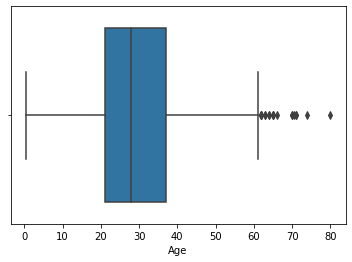

In [839]:
sns.boxplot(train['Age'])

In [840]:
train[train['Age']>65]['Survived'].value_counts()

0    7
1    1
Name: Survived, dtype: int64

In [841]:
train[train['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


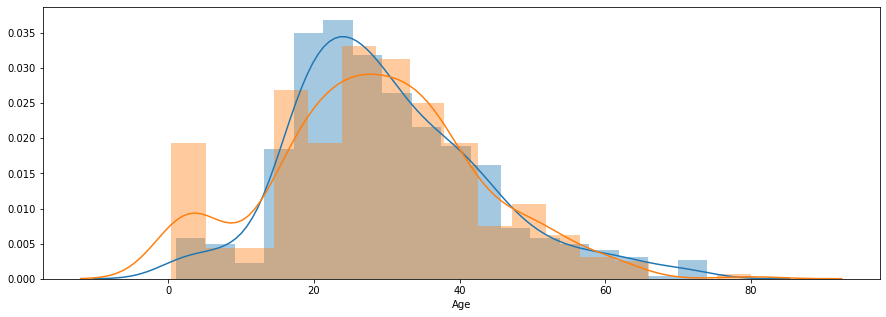

In [842]:
plt.subplots(figsize=(15,5))
sns.distplot(train[train['Survived']==0]['Age'])
sns.distplot(train[train['Survived']==1]['Age'])

In [843]:
passengerid=test['PassengerId'].values
passengerid

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [844]:
train.drop(columns=['PassengerId','Ticket'],inplace=True)
test.drop(columns=['PassengerId','Ticket'],inplace=True)

In [845]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

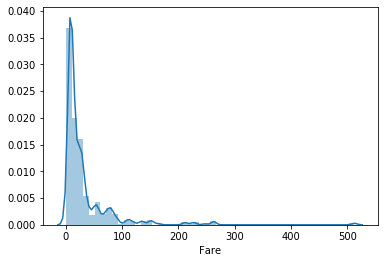

In [846]:
sns.distplot(train['Fare'])

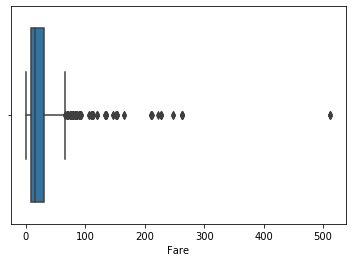

In [847]:
sns.boxplot(train['Fare'])

In [848]:
train[train['Fare']>300]['Survived'].value_counts()

1    3
Name: Survived, dtype: int64

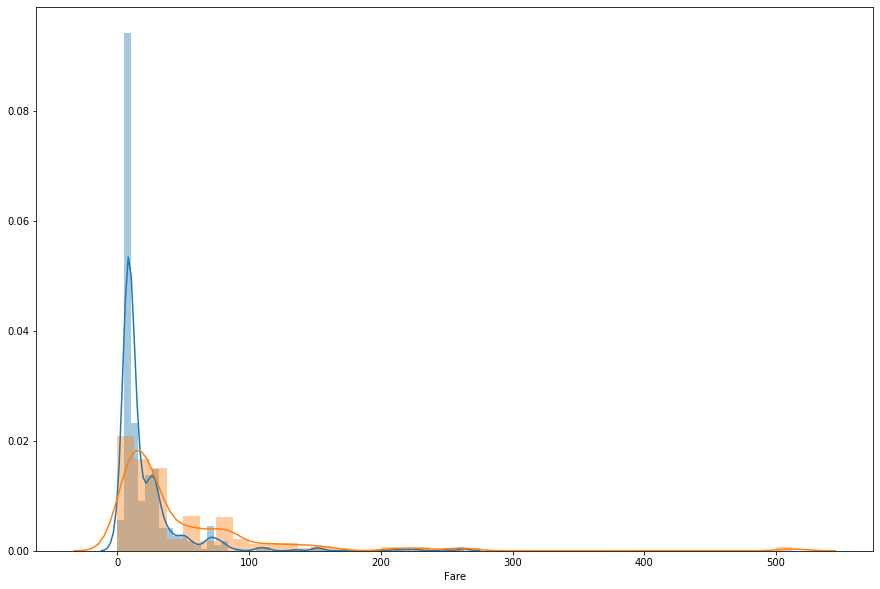

In [849]:
plt.subplots(figsize=(15,10))
sns.distplot(train[train['Survived']==0]['Fare'])
sns.distplot(train[train['Survived']==1]['Fare'])


In [850]:
# Don't delete this unless it's first January
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [851]:
train['Designation']=np.nan
test['Designation']=np.nan
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Designation
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,NaN
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,NaN
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,NaN
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,NaN
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,23.4500,S,NaN
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,NaN


In [852]:
train['Designation']=np.where(train['Name'].str.contains('Mr. '),'Mr',train['Designation'])
train['Designation']=np.where(train['Name'].str.contains('Mrs. '),'Mrs',train['Designation'])
train['Designation']=np.where(train['Name'].str.contains('Miss. '),'Miss',train['Designation'])
train['Designation']=np.where(train['Name'].str.contains('Master. '),'Mas',train['Designation'])
mask1=~(train['Name'].str.contains('Mr. ') | train['Name'].str.contains('Mrs. ') | train['Name'].str.contains('Miss. ') | train['Name'].str.contains('Master. '))
mask2=~(test['Name'].str.contains('Mr. ') | test['Name'].str.contains('Mrs. ') | test['Name'].str.contains('Miss. ') | test['Name'].str.contains('Master. '))
train['Designation']=np.where(mask1,'NoDes',train['Designation'])
test['Designation']=np.where(test['Name'].str.contains('Mr. '),'Mr',test['Designation'])
test['Designation']=np.where(test['Name'].str.contains('Mrs. '),'Mrs',test['Designation'])
test['Designation']=np.where(test['Name'].str.contains('Miss. '),'Miss',test['Designation'])
test['Designation']=np.where(test['Name'].str.contains('Master. '),'Mas',test['Designation'])
test['Designation']=np.where(mask2,'NoDes',test['Designation'])

In [853]:
train['Designation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Mas', 'NoDes'], dtype=object)

In [854]:
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)

In [855]:
train['Family']=train['SibSp']+train['Parch'] + 1
test['Family']=test['SibSp']+test['Parch'] + 1

In [856]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [857]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [858]:
def family_size(number):
    if number==1:
        return "Alone"
    elif (number >1) & (number<5):
        return "Small"
    else:
        return "Large"

In [859]:
train['family_size']=train['Family'].apply(family_size)

In [860]:
test['family_size']=test['Family'].apply(family_size)

In [861]:
train.drop(columns=['Family'],inplace=True)
test.drop(columns=['Family'],inplace=True)

In [862]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Designation,family_size
0,0,3,male,22.0,7.2500,S,Mr,Small
1,1,1,female,38.0,71.2833,C,Mrs,Small
2,1,3,female,26.0,7.9250,S,Miss,Alone
3,1,1,female,35.0,53.1000,S,Mrs,Small
4,0,3,male,35.0,8.0500,S,Mr,Alone
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,NoDes,Alone
887,1,1,female,19.0,30.0000,S,Miss,Alone
888,0,3,female,25.0,23.4500,S,Miss,Small
889,1,1,male,26.0,30.0000,C,Mr,Alone


In [863]:
y=train['Survived'].values

In [864]:
X=train.drop(columns='Survived')

In [865]:
X

,Pclass,Sex,Age,Fare,Embarked,Designation,family_size
0,3,male,22.0,7.2500,S,Mr,Small
1,1,female,38.0,71.2833,C,Mrs,Small
2,3,female,26.0,7.9250,S,Miss,Alone
3,1,female,35.0,53.1000,S,Mrs,Small
4,3,male,35.0,8.0500,S,Mr,Alone
...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,NoDes,Alone
887,1,female,19.0,30.0000,S,Miss,Alone
888,3,female,25.0,23.4500,S,Miss,Small
889,1,male,26.0,30.0000,C,Mr,Alone


In [866]:
final=X.append(test)

In [106]:
final=pd.get_dummies(final,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [107]:
final

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Small
0,22.0,7.2500,0,1,1,0,1,0,1
1,38.0,71.2833,0,0,0,0,0,0,1
2,26.0,7.9250,0,1,0,0,1,0,0
3,35.0,53.1000,0,0,0,0,1,0,1
4,35.0,8.0500,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
413,17.0,8.0500,0,1,1,0,1,0,0
414,39.0,108.9000,0,0,0,0,0,0,0
415,38.5,7.2500,0,1,1,0,1,0,0
416,29.0,8.0500,0,1,1,0,1,0,0


In [108]:
Xf=final.tail(418).values

In [109]:
X=final.head(891).values

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [112]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter='random',max_leaf_nodes=4)

In [113]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [114]:
y_pred=classifier.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(y_test,y_pred)

0.7877094972067039

0.7932960893854749

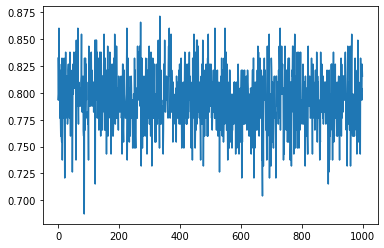

In [117]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(scores)
np.median(scores)

0.8

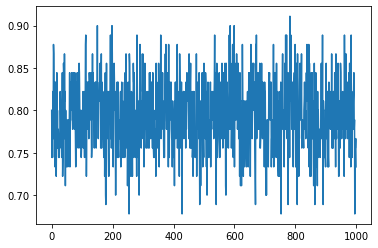

In [118]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(scores)
np.median(scores)

0.7892376681614349

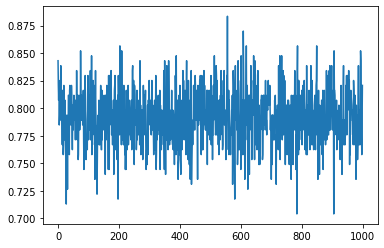

In [119]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(scores)
np.median(scores)

0.7985074626865671

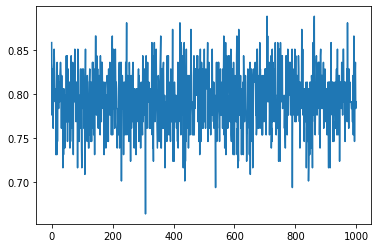

In [120]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(scores)
np.median(scores)

In [121]:
yf=classifier.predict(Xf)

In [122]:
yf.shape

(418,)

In [123]:
submission=pd.DataFrame()

In [124]:
submission['PassengerId']=passengerid
submission['Survived']=yf

In [125]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [162]:
submission.to_csv('submission.csv',index=False)

In [867]:
final

,Pclass,Sex,Age,Fare,Embarked,Designation,family_size
0,3,male,22.0,7.2500,S,Mr,Small
1,1,female,38.0,71.2833,C,Mrs,Small
2,3,female,26.0,7.9250,S,Miss,Alone
3,1,female,35.0,53.1000,S,Mrs,Small
4,3,male,35.0,8.0500,S,Mr,Alone
...,...,...,...,...,...,...,...
413,3,male,30.0,8.0500,S,Mr,Alone
414,1,female,39.0,108.9000,C,NoDes,Alone
415,3,male,38.5,7.2500,S,Mr,Alone
416,3,male,35.0,8.0500,S,Mr,Alone


In [868]:
final=final.drop(columns='Fare')

In [869]:
final

,Pclass,Sex,Age,Embarked,Designation,family_size
0,3,male,22.0,S,Mr,Small
1,1,female,38.0,C,Mrs,Small
2,3,female,26.0,S,Miss,Alone
3,1,female,35.0,S,Mrs,Small
4,3,male,35.0,S,Mr,Alone
...,...,...,...,...,...,...
413,3,male,30.0,S,Mr,Alone
414,1,female,39.0,C,NoDes,Alone
415,3,male,38.5,S,Mr,Alone
416,3,male,35.0,S,Mr,Alone


In [870]:
final=pd.get_dummies(final,columns=['Pclass','Sex','Embarked','family_size','Designation'],drop_first=True)

In [871]:
final

,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Small,Designation_Miss,Designation_Mr,Designation_Mrs,Designation_NoDes
0,22.0,0,1,1,0,1,0,1,0,1,0,0
1,38.0,0,0,0,0,0,0,1,0,0,1,0
2,26.0,0,1,0,0,1,0,0,1,0,0,0
3,35.0,0,0,0,0,1,0,1,0,0,1,0
4,35.0,0,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,0,1,1,0,1,0,0,0,1,0,0
414,39.0,0,0,0,0,0,0,0,0,0,0,1
415,38.5,0,1,1,0,1,0,0,0,1,0,0
416,35.0,0,1,1,0,1,0,0,0,1,0,0


In [898]:
Xf=final.tail(418).values

In [899]:
X=final.head(891).values

In [900]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.12)

In [901]:
from sklearn.tree import DecisionTreeClassifier

In [902]:
classifier=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3)

In [903]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [904]:
y_pred=classifier.predict(X_test)

In [905]:
accuracy_score(y_test,y_pred)

0.8504672897196262

0.8268156424581006

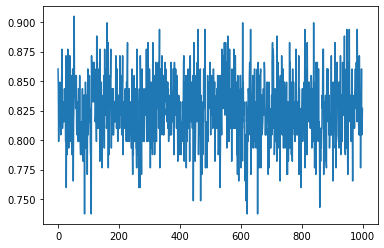

In [906]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(scores)
np.median(scores)

0.8333333333333334

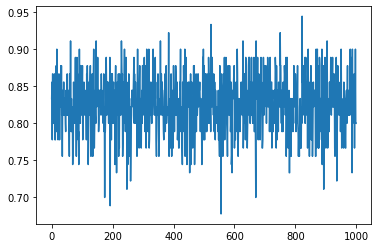

In [907]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(scores)
np.median(scores)

0.8317757009345794

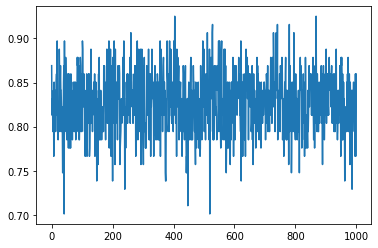

In [908]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.12)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(scores)
np.median(scores)

0.8251121076233184

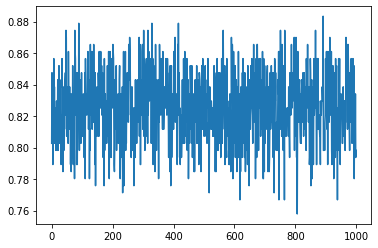

In [909]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(scores)
np.median(scores)

0.8283582089552238

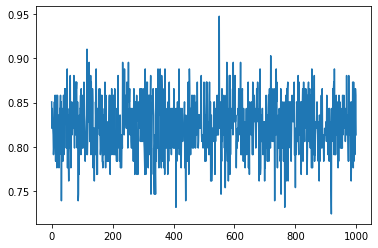

In [910]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(scores)
np.median(scores)

In [911]:
classifier.get_depth()

3

In [912]:
yf=classifier.predict(Xf)

In [913]:
submission=pd.DataFrame()
submission['PassengerId']=passengerid
submission['Survived']=yf
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [914]:
submission.to_csv('submission.csv',index=False)

In [915]:
gender=pd.read_csv('gender_submission.csv')

In [916]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
accuracy_score(gender['Survived'],submisso)